<h1><center>Food for good - Applied Data Analysis project</center></h1>

![title](images/openfoodfacts.png)

## Table of content

### 1. Cleaning the data:

- Removing columns that have very high values of NaN.
- Correcting some mistakes (inputs errors).

        
### 2. Data Visualization: 

#### A. Quality of food:

- Products with palm oil.
- Products with additives.
- Countries with palm oil.
    
####    B. Carbon Footprint:

- the goods with the highest carbon foodprint.

## 1. Cleaning the data:

In [1]:
# Importing several useful packages

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
from scipy.stats import pearsonr
warnings.filterwarnings("ignore")
import seaborn as sns
sns.set(color_codes=True)
import folium
import json
import branca.colormap as cm
from wordcloud import WordCloud, STOPWORDS


__Insights on our database:__

- Our dataset is in a csv format.
- Our dataset has a size of `1.7Gb`
- Manageable by pandas with a `\t` separator.

So we will be working with the several features of our dataset. In order to resume these features, we will categorise them as :  

- _Generalities:_ these fields contain general informations on the products of our dataset, their dates, modifications, product name, code bar of the product, the quantity, etc.
- _tags:_ these fields contain information about packaging, brands, categories, countries, stores, manufacturies and other interesting tags.
- _Ingredients:_ these fields contain features about ingredients.
- _Nutrition facts:_ these fields contain anything that relates to nutriements, macros and micros.

In [2]:
df_open_food_fact = pd.read_csv('en.openfoodfacts.org.products.csv', sep="\t", error_bad_lines=False)
df_open_food_fact.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
0,0000000000017,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1529059080,2018-06-15T10:38:00Z,1529059204,2018-06-15T10:40:04Z,Vitória crackers,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000000031,http://world-en.openfoodfacts.org/product/0000...,isagoofy,1539464774,2018-10-13T21:06:14Z,1539464817,2018-10-13T21:06:57Z,Cacao,NaN,130 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0000000000123,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1535737982,2018-08-31T17:53:02Z,1535737986,2018-08-31T17:53:06Z,Sauce Sweety chili 0%,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0000000000291,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1534239669,2018-08-14T09:41:09Z,1534239732,2018-08-14T09:42:12Z,Mendiants,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0000000000949,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1523440813,2018-04-11T10:00:13Z,1523440823,2018-04-11T10:00:23Z,Salade de carottes râpées,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We directly notice that our dataset is full of `NaN`, so we will obviously have to do some cleaning and stay aware of this detail while exploring it and analysing it. Furthermore, it is important to point out that droping all `NaN` values will leave us with an empty DataFrame which means that all our rows contain at least one `NaN` value. Which should not be very surprising since the features related to _Nutrition facts_ have some facts that are rare and that we don't find in every product. Through our analysis we will have more insight on these points.

__Shape of our dataset:__

In [3]:
df_open_food_fact.shape

(683284, 173)

__Some investigations over the NAN values:__

We now look at the number of nan values in each column and plot their distribution:

In [4]:
nan_values_per_column = df_open_food_fact.isnull().sum(axis=0).sort_values(ascending=False)
nan_values_per_column.head()

nutrition_grade_uk                       683284
cities                                   683284
ingredients_that_may_be_from_palm_oil    683284
ingredients_from_palm_oil                683284
-nervonic-acid_100g                      683283
dtype: int64

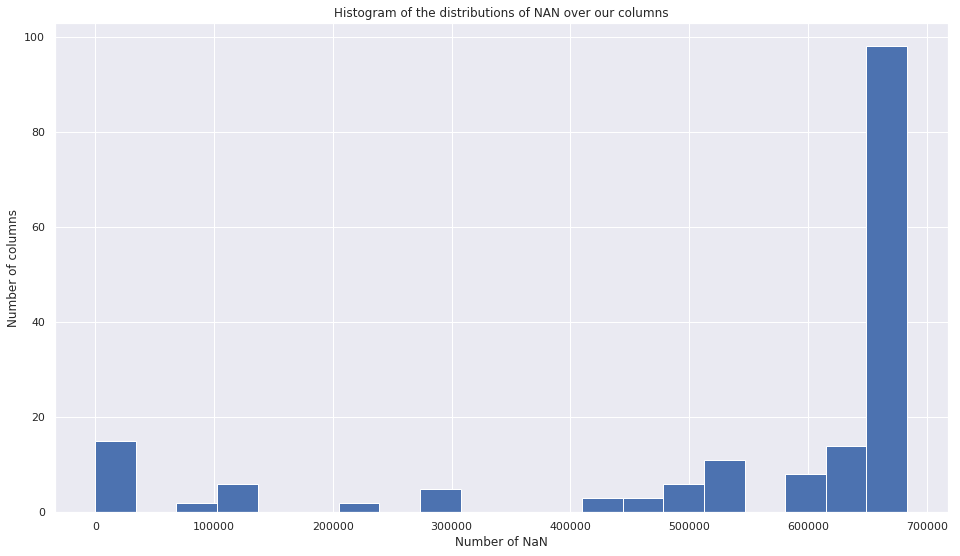

In [5]:
# Implementing the plot of the distributions of NAN over our columns.

plt.figure(figsize=(16,9))
plt.title('Histogram of the distributions of NAN over our columns')
nan_values_per_column.hist(bins=20)
plt.xlabel('Number of NaN')
plt.ylabel('Number of columns')
plt.show()

We notice that more than 100 columns have more than 600 000 Nan values on around 700 000 entries. We can understand from this that these columns may not be very pertinent.

In [6]:
# A list that contains the features that have more than 600 000 NAN
list_high_nan = list(nan_values_per_column[nan_values_per_column > 600000].index.values)

Let's use the `WordCloud` package to visualise these features with very high amounts of NAN.

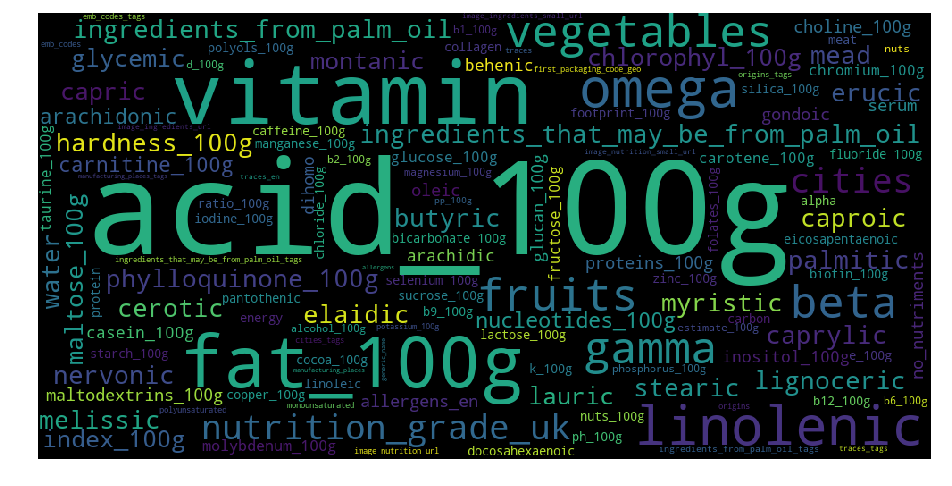

In [53]:
# convert list to string and generate

# We implement a method in order to do the Worldmap in order to use it again later
def world_map(list_to_wmap):
    """
    list: the list we wish to proceed the worldmap on
    """
    unique_string=(" ").join(list_to_wmap)
    wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
    plt.figure(figsize=(16,9))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
    plt.close()

world_map(list_high_nan)

In [8]:
# How our DataFrame would look like if we remove all the features with the high amounts of NAN.
df_open_food_fact.drop(list_high_nan, axis=1).head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,quantity,packaging,...,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,0000000000017,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1529059080,2018-06-15T10:38:00Z,1529059204,2018-06-15T10:40:04Z,Vitória crackers,NaN,NaN,...,NaN,7.8,1.40,0.551181,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000000031,http://world-en.openfoodfacts.org/product/0000...,isagoofy,1539464774,2018-10-13T21:06:14Z,1539464817,2018-10-13T21:06:57Z,Cacao,130 g,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0000000000123,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1535737982,2018-08-31T17:53:02Z,1535737986,2018-08-31T17:53:06Z,Sauce Sweety chili 0%,NaN,NaN,...,NaN,0.2,2.04,0.803150,NaN,NaN,NaN,NaN,NaN,NaN
3,0000000000291,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1534239669,2018-08-14T09:41:09Z,1534239732,2018-08-14T09:42:12Z,Mendiants,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0000000000949,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1523440813,2018-04-11T10:00:13Z,1523440823,2018-04-11T10:00:23Z,Salade de carottes râpées,NaN,NaN,...,NaN,0.9,0.42,0.165354,NaN,NaN,NaN,NaN,NaN,NaN


We now look at the number of `NAN` for each row and plot its distribution

In [9]:
# Rows containing NAN values
nan_rows = df_open_food_fact.isnull().sum(axis=1).sort_values()
nan_rows.values

array([ 29,  79,  81, ..., 163, 163, 163])

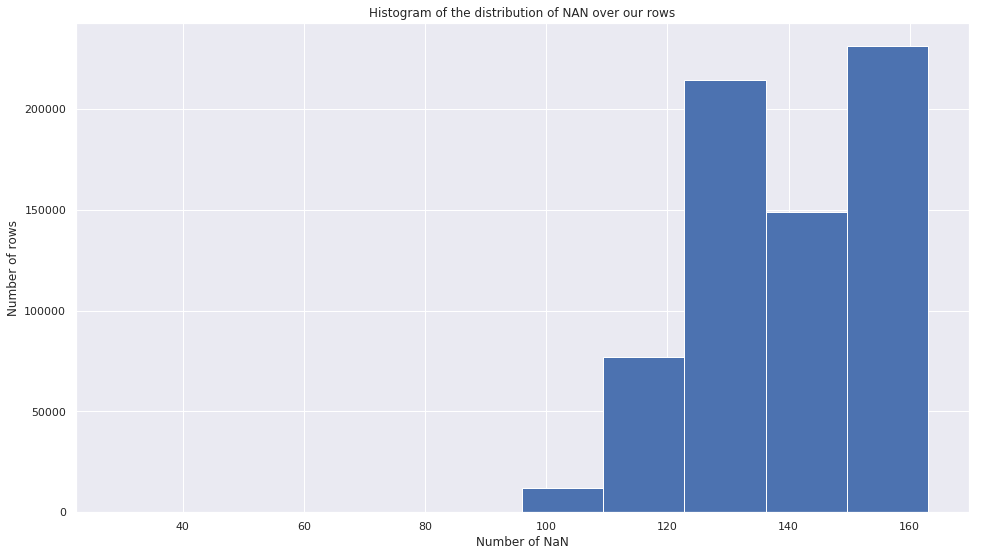

In [10]:
plt.figure(figsize=(16,9))
plt.title('Histogram of the distribution of NAN over our rows')
plt.hist(nan_rows.values)
plt.xlabel('Number of NaN')
plt.ylabel('Number of rows')
plt.show()

We notice that over the rows, we have lots of `NaN` which should not be very surprising due to the number of columns where we almost have only `NaN`.

__Length of rows having less than 100 NAN values in their rows:__

In [11]:
# The length of rows having less than 100 NAN values in their rows
len(nan_rows[nan_rows < 100])

270

There are only _270_ on _695 207 rows_ that have __less__ than _100_ nan values in their columns!

We can clean the dataset by removing the columns that have very high values of NaN.

In [12]:
# We remove the features that have very high number of nan values, but keep some of them that are relevant even if 
# they also  have high numbers of NAN values

features_to_remove = list(nan_values_per_column[nan_values_per_column > 600000].index.values)
features_to_keep = ['allergens', 'ingredients_that_may_be_from_palm_oil',
                    'traces', 'emb_codes', 'origins', 'cities']

# Removing what should be removed and keeping what should be kept
features_to_remove = [item for item in features_to_remove if item not in features_to_keep]
features_to_remove.extend(['code', 'url', 'creator', 'serving_size',  # 'product_name' 
                           'nutrition-score-uk_100g',
                           'last_modified_t', 'last_modified_datetime'])

# When some columns are tags, we remove them because they are redundant
# We add them these redundant columns to the list of columns to remove 
for col in df_open_food_fact.columns.values:
    if '_en' in col:
        features_to_remove.append(col.replace('_en', ''))
    if 'tags' in col:
        features_to_remove.append(col)
        
# The list of redundant columns to remove
features_to_remove = set(list(features_to_remove))
cleaned_df = df_open_food_fact.drop(features_to_remove, axis=1)
cleaned_df.head()

,created_t,created_datetime,product_name,quantity,packaging,brands,categories_en,origins,labels_en,emb_codes,...,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g
0,1529059080,2018-06-15T10:38:00Z,Vitória crackers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15.0,NaN,7.8,1.40,0.551181,NaN,NaN,NaN,NaN,NaN
1,1539464774,2018-10-13T21:06:14Z,Cacao,130 g,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1535737982,2018-08-31T17:53:02Z,Sauce Sweety chili 0%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.4,NaN,0.2,2.04,0.803150,NaN,NaN,NaN,NaN,NaN
3,1534239669,2018-08-14T09:41:09Z,Mendiants,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1523440813,2018-04-11T10:00:13Z,Salade de carottes râpées,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.9,NaN,0.9,0.42,0.165354,NaN,NaN,NaN,NaN,NaN


#### Correcting some mistakes

#### The energy

We know that the energy a product contains can mainly be calculated through his amount of carbs, fat and proteins. We have :
- 1g of fat => 39 Kj.
- 1g of carbohydrates => 17 Kj.
- 1g of protein => 17 Kj.

By calculating the energy based on the features `fat`, `carbohydrates` and `proteins`, then comparing it to the given value of energy we can detect if some entries are wrong.

__REFERENCE:__
https://2012books.lardbucket.org/books/principles-of-general-chemistry-v1.0/s09-04-thermochemistry-and-nutrition.html

In [13]:
# We get the values of Macros, we compute our own energy and then compute the relative error between our value and 
# the energy given by the dataset

energy_data = cleaned_df.loc[:,['carbohydrates_100g', 'proteins_100g', 'fat_100g', 'energy_100g']].dropna()
energy_data['calculated_energy'] = 17*energy_data['carbohydrates_100g'] + energy_data['proteins_100g'] + 39*energy_data['fat_100g']
energy_data['error(in %)'] = abs(energy_data['calculated_energy']/energy_data['energy_100g']-1) *100
energy_data.head(10)

,carbohydrates_100g,proteins_100g,fat_100g,energy_100g,calculated_energy,error(in %)
0,70.1,7.8,7.0,1569.0,1472.5,6.150414
2,4.8,0.2,0.0,88.0,81.8,7.045455
4,5.3,0.9,0.3,134.0,102.7,23.358209
5,16.3,4.4,4.9,540.0,472.6,12.481481
8,38.4,11.7,3.3,929.0,793.2,14.617869
9,41.0,12.5,9.4,1213.0,1076.1,11.286068
10,30.3,9.7,5.9,916.0,754.9,17.587336
11,27.3,4.6,22.0,1594.0,1326.7,16.769134
12,24.0,0.0,0.0,418.0,408.0,2.392344
13,39.0,7.8,21.0,657.0,1489.8,126.757991


In [14]:
# Small Analysis over these relative errors
print(energy_data['calculated_energy'].describe())
print(10*'--')
print(energy_data['energy_100g'].describe())
print(10*'--')
print(energy_data['error(in %)'].replace([np.inf, -np.inf], np.nan).dropna().describe())

count    5.755560e+05
mean     1.053566e+03
std      6.314687e+03
min     -8.000000e+02
25%      2.949975e+02
50%      9.471900e+02
75%      1.559325e+03
max      2.601967e+06
Name: calculated_energy, dtype: float64
--------------------
count    5.755560e+05
mean     1.171403e+03
std      7.815482e+03
min      0.000000e+00
25%      4.180000e+02
50%      1.096000e+03
75%      1.674000e+03
max      2.845810e+06
Name: energy_100g, dtype: float64
--------------------
count    557598.000000
mean         48.919119
std        1228.061160
min           0.000000
25%           3.607889
50%           9.617248
75%          20.821170
max      509900.000000
Name: error(in %), dtype: float64


We notice that there are some **obvious outliers** :
- there are some **negative values** in the calculated energy
- an energy amount **exceeding 3900kJ** ( the maximum energy amount a product can have is 3900kJ and it corresponds to a product which have 100% of fat, remember that 1g of fat = 39 Kj )

So we delete these products. 

In [15]:
# droping obvious errors
energy_data = energy_data.loc[energy_data.calculated_energy>0] 

energy_data = energy_data.loc[energy_data.energy_100g<3900] 
energy_data = energy_data.loc[energy_data.calculated_energy<3900] 

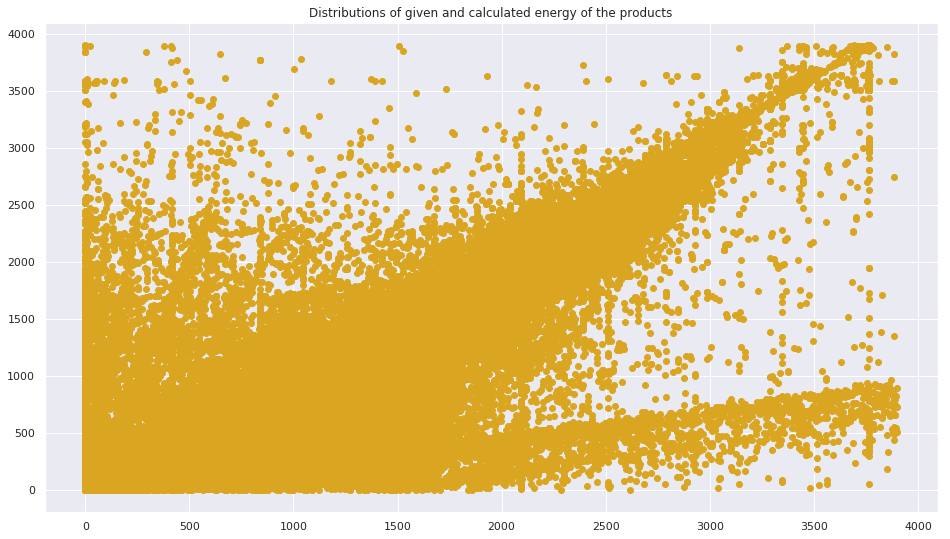

In [16]:
# Visualization of the errors
plt.figure(figsize=(16,9))
plt.title('Distributions of given and calculated energy of the products')
plt.scatter(energy_data["energy_100g"], energy_data["calculated_energy"], c= "goldenrod")
plt.show()

We notice that there are a lot of calculated energy values that differ from the given energy (values not on the axis `y=x`).  These wrong values may come from wrong input values entered by some users. 

Another suspicious thing we noticed is that in some cases we have __Sum of features > 100g__.
Our features (`carbohydrates`, `proteins` and `fats`) are given based on 100g. Then if the sum of theses features is higher than 100, we can conclude that the user put wrong values. So we can drop these rows.

In [17]:
# We compute the sum over these macros
energy_data["g_sum"] = energy_data['carbohydrates_100g'] + energy_data['proteins_100g'] + energy_data['fat_100g']
# We assign 1 anytime we exceed 100
energy_data["exceeded"] = np.where(energy_data.g_sum.values > 100, 1, 0)
# We count the number of occurences of this issue
energy_data[energy_data.exceeded == 1].count()

carbohydrates_100g    2232
proteins_100g         2232
fat_100g              2232
energy_100g           2232
calculated_energy     2232
error(in %)           2232
g_sum                 2232
exceeded              2232
dtype: int64

There are __2272__ wrong values (sum of the features > 100g), out of 588 209 values. We can drop them.



In [18]:
# new data without 'sum of feature > 100g' error
new_energy_data = energy_data.loc[energy_data.exceeded != 1]

# small analysis with new data 
new_energy_data['error(in %)'].replace([np.inf, -np.inf], np.nan).dropna().describe()

count    548330.000000
mean         46.008912
std        1145.404152
min           0.000000
25%           3.609195
50%           9.614780
75%          20.544505
max      509900.000000
Name: error(in %), dtype: float64

As expected, the percentage of relative errors goes down, suggesting that these wrong values indeed come from wrong input values entered by some users ( 'sum of the features > 100 g', negative values, too high energies ). But there are still high errors. Therefore, we make the choice of deleting energies with **error higher than 14.5%** (corresponding of a quantile of 90%). Now, we will have a better distribution of given and calculated energy of products.

In [19]:
# new data without errors > 14.5%
print('90% quantile : ',energy_data['error(in %)'].replace([np.inf, -np.inf], np.nan).dropna().quantile(0.90))
new_energy_data = new_energy_data.loc[energy_data['error(in %)']<14.5] 

90% quantile :  44.30372965641954


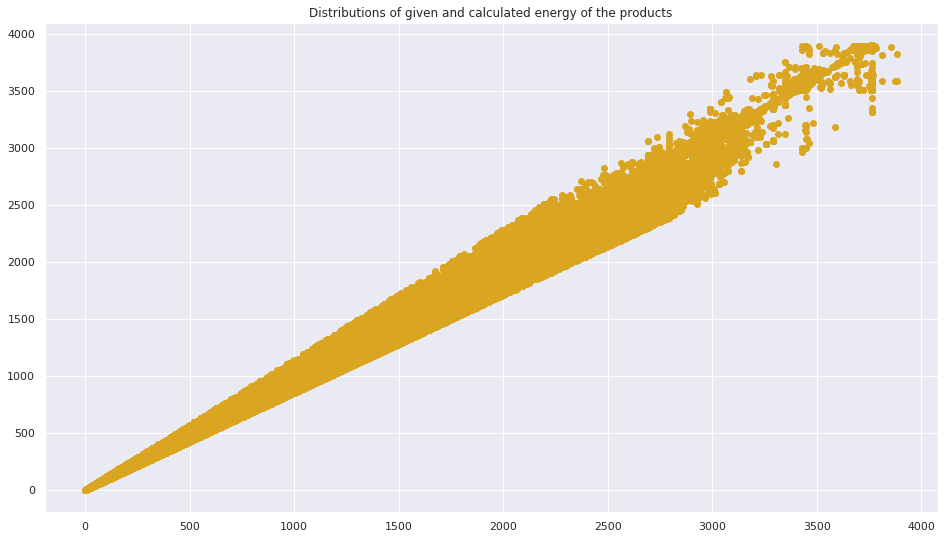

In [20]:
plt.figure(figsize=(16,9))
plt.title('Distributions of given and calculated energy of the products')
plt.scatter(new_energy_data["energy_100g"], new_energy_data["calculated_energy"], c= "goldenrod")
plt.show()

For now on, our data is supposed to be __clean__. However, we are aware that it still contains some __NaN and outliers, so before each specific analysis/visualization, we will try to deal with NaN values and outliers in order to stay accurate through the analysis__

### 2. Data Visualization

#### A. Quality of food

Now that we cleaned the data, we can revisit the features we have and visualize how many Nan values they have relatively

_WordMap of the kept columns_

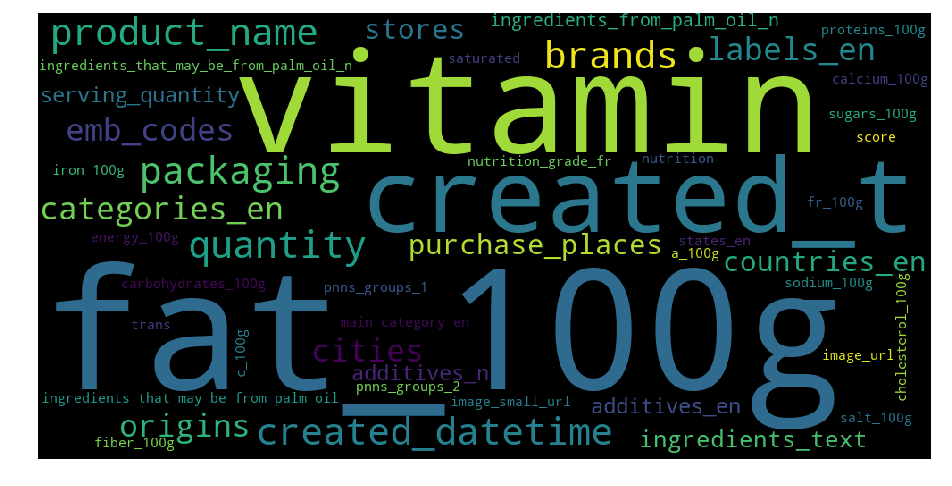

In [54]:
columns_kept = list(cleaned_df.columns.values)
world_map(columns_kept)

#### Products with additives

In [22]:
# We take only the products where we have additives
products_w_additives = cleaned_df.loc[:,['main_category_en','additives_n']].dropna()[cleaned_df.additives_n > 0]

In [23]:
# the following dataframe contains the number of elements in each category where we have additives.
df_category_count = products_w_additives.groupby(['main_category_en', 'additives_n'])['main_category_en'].count().reset_index(name="count")
df_category_count.tail()

,main_category_en,additives_n,count
3665,zh:Coconut-gel,2.0,1
3666,zh:Low-fat-high-calcium-milk,3.0,1
3667,zh:Sugar-cane-drink,1.0,1
3668,משקאות-קלים,3.0,1
3669,شوكلاته,1.0,1


<font size="3">We notice from looking at the tail of the dataframe is that we have some categories that have "zh" at the beginning. We will use a method in order to split these to have a cleaner dataframe.

We will perform this on the overall dataframe since it is going to be useful for all our analysis.</font>

In [24]:
# We first split this column into two different columns with respect to the delimiter, in our case it's ":"
split = cleaned_df['main_category_en'].str.split(":", expand=True)

# We sort the values where we can find "None", since there are categories that are clean (without delimiter)
# the sort is also performed so that these None values can be grouped
split[1] = split[1].sort_values()
# We replace these None values by NaN so that we can drop them
split_without_nan = split.replace(to_replace='None', value=np.nan).dropna()
# We register the length of our values that dont contain NaN
length_without_nan = len(split_without_nan)

# We concatenante the first clean column but taking only the clean values from a column, and the rest from the other
clean_categories = pd.concat([split.iloc[:len(split)-length_without_nan][0], split_without_nan[1]])
cleaned_df['main_category_en'] = clean_categories.values

<font size="3">Let's look for outliers, in order to do that, let's visualize the distribution.</font>

In [33]:
products_w_additives = cleaned_df.loc[:,['main_category_en','additives_n']].dropna()[cleaned_df.additives_n > 0]
df_category_count = products_w_additives.groupby(['main_category_en', 'additives_n'])\
                    ['main_category_en'].count().reset_index(name="count")

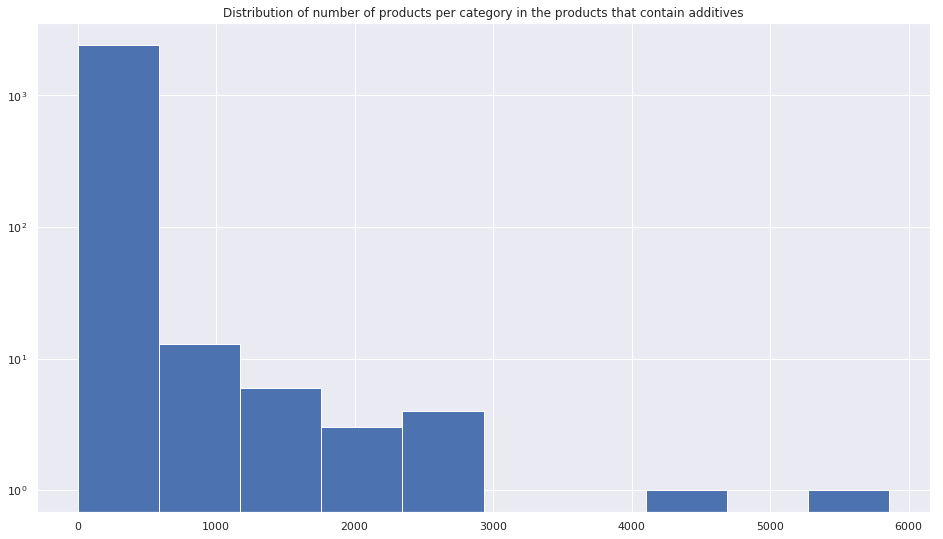

In [26]:
plt.figure(figsize=(16,9))
plt.title('Distribution of number of products per category in the products that contain additives')
df_category_count['count'].hist(log=True)

<font size="3">So we clearly notice that we have several outliers where the categories containing additives contains only one product, we will drop these categories to have a better analysis.</font>

In [27]:
df_products_w_additives_clean = df_category_count.loc[:,['main_category_en','additives_n']].dropna()\
                                [df_category_count['count'] > 1]

In [28]:
# We see the amount of additives that exists for each category
sum_products_w_additives = df_products_w_additives_clean.groupby('main_category_en').sum().\
                        sort_values(by=['additives_n'], ascending=False)

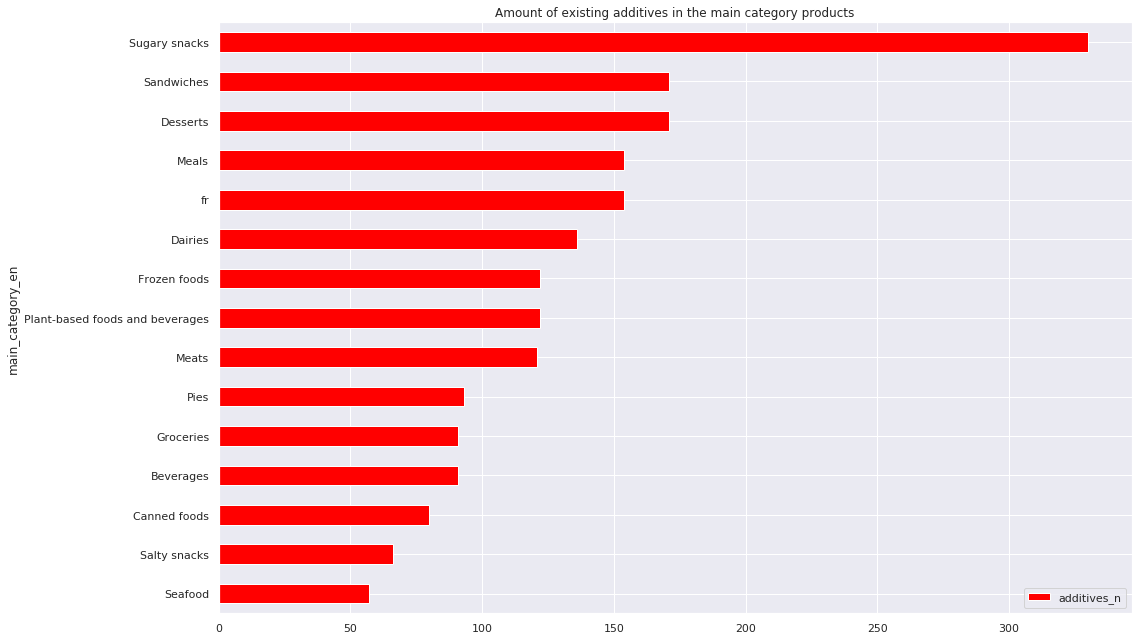

In [29]:
# We plot the amount of additives existing in the main category groupby of products
sum_products_w_additives[:15][::-1].plot(kind='barh', figsize=(16,9), color='red')
plt.title('Amount of existing additives in the main category products')
plt.tight_layout()
plt.show()

<font size="3">We notice that this plot is not really significant because the number of products of each category can greatly differ from a category to an other. Hence, it is preferable to look at the __averaged amounts__ of additives per product in each category.</font>

In [30]:
# We take only the products where we have additives and we look at the average
avg_products_w_additives = df_products_w_additives_clean.groupby('main_category_en').mean().\
                        sort_values(by=['additives_n'], ascending=False)

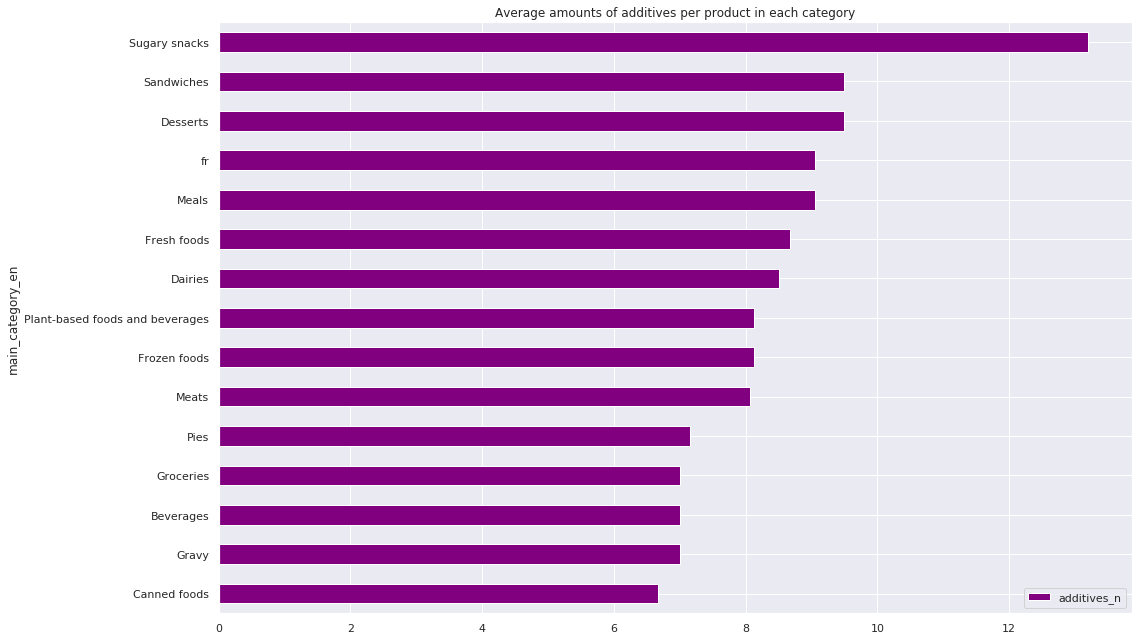

In [31]:
# We plot the average amount of additives existing in the main category groupby of products
avg_products_w_additives[:15][::-1].plot(kind='barh', figsize=(16,9), color='purple')
plt.title('Average amounts of additives per product in each category')
plt.tight_layout()
plt.show()

<font size="3">As we thought, looking at the average amounts of additives per product in each category is more representative than looking only at the sum of additives over all products per category. We notice some changes for some categories but overall we see that `Sugary snacks`, `Sandwiches` and `Desserts` are in the top 3.</font>

#### Products with Palm Oil

<font size="3">Since we have two columns that describe ingredients that are related to palm oil:

`ingredients_that_may_be_from_palm_oil_n` and `ingredients_from_palm_oil_n`

Let's have a look at each of these.</font>

In [104]:
likely_palm_oil = cleaned_df[['ingredients_that_may_be_from_palm_oil_n', 'categories_en']].dropna()
#likely_poil = likely_poil[likely_poil.ingredients_that_may_be_from_palm_oil_n>=1]
print('number of rows containing products that have ingredients that are likely from palm oil: '+str(len(likely_poil)))


palm_oil = cleaned_df[['ingredients_from_palm_oil_n', 'categories_en']].dropna()
#poil = poil[poil.ingredients_from_palm_oil_n>=1]
print('number of rows containing products that have ingredients that are  from palm oil: '+str(len(poil)))

number of rows containing products that have ingredients that are likely from palm oil: 141753
number of rows containing products that have ingredients that are  from palm oil: 141753


In [105]:
if set(poil.index) == set(likely_poil.index):
    print("products that likely contain palm oil are exactly the same as the ones that surely contain palm oil")

products that likely contain palm oil are exactly the same as the ones that surely contain palm oil


<font size="3">Let's look at the __Worldmap__ of products that surely contains palm oil in order to have an idea of what these are</font> 

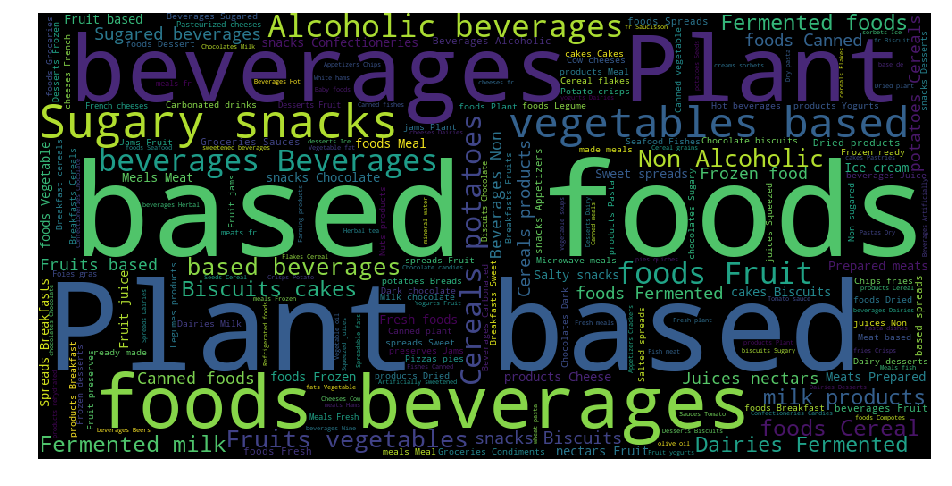

In [103]:
#products_with_palm_oil = list(poil)
#world_map(products_with_palm_oil)
liste = [str(e) for e in cleaned_df.iloc[poil.index]['categories_en'].values.tolist()]
world_map(liste)

<font size="3">let's have a look on the difference between the two columns `'ingredients_that_may_be_from_palm_oil_n` and `ingredients_from_palm_oil_n` </font>

In [125]:
merge = pd.concat([palm_oil, likely_palm_oil], axis=1)
merge['diff'] = merge.ingredients_that_may_be_from_palm_oil_n-merge.ingredients_from_palm_oil_n

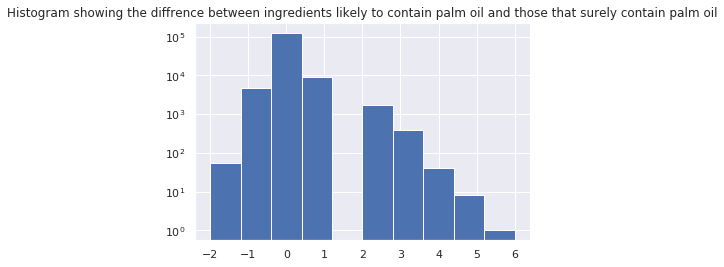

In [127]:
plt.title('Histogram showing the diffrence between ingredients likely to contain palm oil and those that surely contain palm oil')
plt.hist(merge['diff'].values)
plt.yscale('log')

We notice that the two columns are not the same. Furthermore, the difference of number of ingredients between them don't follow a certain distribution. Indeed, ingredients that likely contain palm oil can be different from the ones that surely contain palm oil and vice-versa. In order to deal with this situation, we will take the sum of both columns considered as a union of products containing palm oil.

<font size="3">Now that we have a general idea about the products that surely contain palm oil, let's focus our interest and analysis on the products that likely contain palm oil so that we can be aware of these in order to take our precautions.</font>

In [32]:
# Products that are likely to contain palm oil
likely_palm_products = cleaned_df.loc[:,['main_category_en', 'ingredients_that_may_be_from_palm_oil_n']]\
                .dropna()[cleaned_df.ingredients_that_may_be_from_palm_oil_n>0]
likely_palm_products.head()
#likely_palm_products.groupby('main_category_en').sum().sort_values(by=['ingredients_that_may_be_from_palm_oil_n'], \
 #                                                        ascending=False).head()

,main_category_en,ingredients_that_may_be_from_palm_oil_n
264,Sugary snacks,1.0
297,Meals,1.0
324,Sugary snacks,1.0
419,Sugary snacks,1.0
483,Desserts,1.0


<font size="3"> Let's have a look at the distribution of the count of categories that have `ingredients_that_may_be_from_palm_oil` in order to have an idea about the existence of outliers </font> 

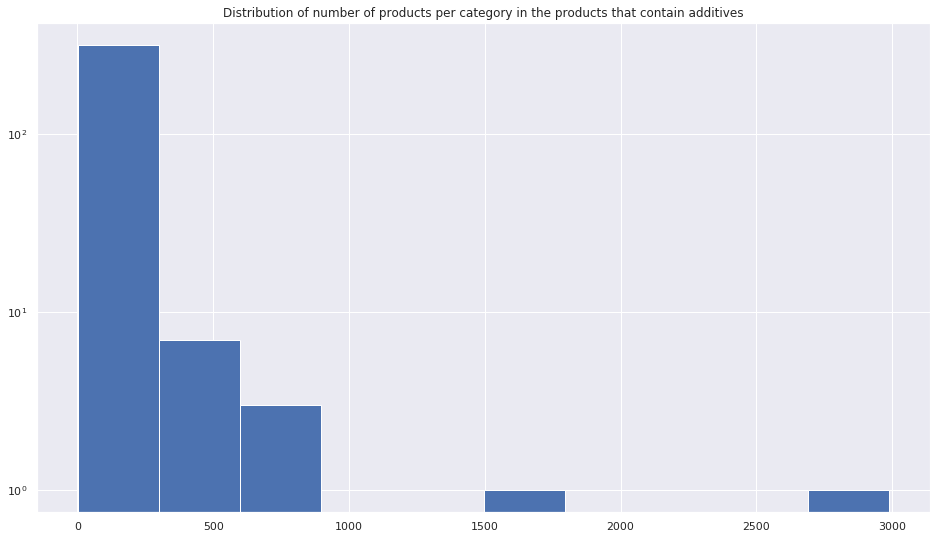

In [35]:
df_category_count = likely_palm_products.groupby(['main_category_en', 'ingredients_that_may_be_from_palm_oil_n'])\
                    ['main_category_en'].count().reset_index(name="count")
plt.figure(figsize=(16,9))
plt.title('Distribution of number of products per category in the products that contain additives')
df_category_count['count'].hist(log=True)

<font size="3">So just like for additives, we notice the existence of several outliers. dropping them seems the best solution to have a good unbiased analysis.</font>

In [88]:
likely_palm_products_clean = df_category_count.loc[:,['main_category_en',\
                                                           'ingredients_that_may_be_from_palm_oil_n']].dropna()\
                                [df_category_count['count'] <= 1]
likely_palm_products_clean
#likely_palm_products_clean[:15][::-1].plot(kind='barh', figsize=(16,9), color='orange')

,main_category_en,ingredients_that_may_be_from_palm_oil_n
0,Acqua-frizzante,1.0
1,Alcools-artisanaux,1.0
2,Aligot,1.0
3,Alimentos-de-origen-vegetal,1.0
5,Aliments-d-origine-vegetale,3.0
7,Anchoiade,1.0
8,Antipasti,2.0
10,Arroz-3-delicias,1.0
11,Artischoken,1.0
12,Assaisonnements,1.0


The products containing ingredients from palm oil / may be from palm oil are especially from:
    - Sugary and salty snacks
    - Plan based food and beverages
    - Meals   

However, we should be aware that this shows us the number of products containing palm oil but not especially the products with the most amount of ingredients coming from palm oil. In the following -just like what we did for additives- we will dig into the average in order to get the products with large amount of ingredients coming from palm oil.  

In order to do this, we focus our analysis on products containing palm oil and also on those that "likely" contain palm oil.

<font size="4"><center> Average amounts of likely palm oil ingredients per category </font><center>

In [37]:
likely_palm_products_clean.groupby('main_category_en').mean().sort_values(by=['ingredients_that_may_be_from_palm_oil_n'], \
                                                         ascending=False).head()

,ingredients_that_may_be_from_palm_oil_n
main_category_en,
Sugary snacks,3.0
Desserts,2.5
Plant-based foods and beverages,2.5
Breakfasts,2.5
fr,2.5


<center><font size="4"> Average amounts of palm oil ingredients per category </font><center>

In [36]:
palm_products.groupby('main_category_en').mean().sort_values(by=['ingredients_from_palm_oil_n'], \
                                                         ascending=False).head()

,ingredients_from_palm_oil_n
main_category_en,
fr:Friands-a-la-viande,1.0
fr:Margarine-huile-olive,1.0
fr:Tartes-aux-fruits,1.0
fr:Pate-a-gateau,1.0
fr:Pate-a-gateaux,1.0


##### Conclusion :#####


While looking at the number of products __containing/likely_containing__ palm oil, we noticed that `sugary and salty snacks` were on the top of our analysis. However, when we look at the average amounts per category, we notice that we have some categories that are less present in the dataset but with higher likely amounts of palm oil, esepcially `bakery products`.

#### Countries with Palm Oil

We first create a function that is going to split the columns containing tags with several entries in order to compute more precisely our counts.

In [37]:
def split_tags_df(df, tags_to_split, separator):
    ''' df = dataframe to split,
    target_column = the column containing the values to split
    separator = the symbol used to perform the split

    returns: a dataframe with each entry for the target column separated, with each element moved into a new row. 
    The values in the other columns are duplicated across the newly divided rows.
    '''
    def splitListToRows(row, row_accumulator, tags_to_split, separator):
        split_row = row[tags_to_split].split(separator)
        for s in split_row:
            new_row = row.to_dict()
            new_row[tags_to_split] = s
            row_accumulator.append(new_row)
    new_rows = []
    df = df.dropna(subset=[tags_to_split])
    df.apply(splitListToRows, axis=1, args = (new_rows, tags_to_split, separator))
    new_df = pd.DataFrame(new_rows)
    return new_df

In [38]:
# dataframe with distinct countries, we use the field 'countries_en' because the names are clearer than in the column named
#countries_tags
cleaned_df = split_tags_df(new_cleaned_df, 'countries_en', ',')

In [39]:
df = cleaned_df.groupby('countries_en').size().reset_index(name='counts')
df[df['counts']>10].head()

,countries_en,counts
1,Albania,22
3,Algeria,123
6,Andorra,14
8,Argentina,32
11,Australia,769


We count the number of products of our dataset that are available in each country.

In [40]:
countries_occurences = cleaned_df['countries_en'].dropna().value_counts()

We know plot a figure of the occurences of the countries to see how countries are represented in our dataset

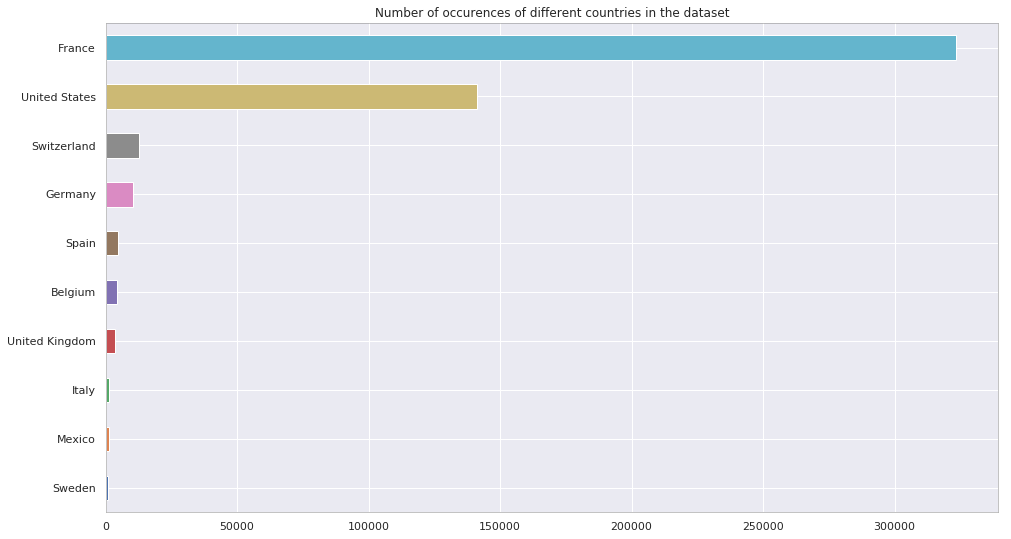

In [41]:
plt.figure(figsize=(16,9))
plt.title('Number of occurences of different countries in the dataset')
countries_occurences[:10][::-1].plot.barh()
plt.show()

So the two most represented countries are __France__ and the __US__. The problem here is that the number of products from France and then the US are so big that we cannot compare in an efficient way with the other countries.

We now want to represent these values on a map using the folium library.
We start by loading a json containing the borders of all the countries of the world.

In [42]:
geo_json_data = json.load(open("world_countries.json",encoding='utf-8'))

We then take the dataframe containing the counts of the products per country, and compute the log of the counts in order to use it in our map. In fact, the log can let us visualize a lot more easily the differences between countries, which would be harder to distinguish because France and the US are predominant.

In [43]:
#we reset the index and rename our columns
products_by_country = countries_occurences.reset_index(name='counts').rename(columns={'index': 'countries_en'})
#we remove the entries containing ":" in order to clean our dataframe
products_by_country = products_by_country.drop(products_by_country[products_by_country.countries_en.str.contains(':')].index)
#We compute the logs and sort the dataframe
products_by_country['Log_of_counts'] = np.log(products_by_country['counts'])
products_by_country.sort_values(by='Log_of_counts',ascending = False).head()

,countries_en,counts,Log_of_counts
0,France,323280,12.686274
1,United States,141090,11.857153
2,Switzerland,12626,9.443513
3,Germany,10367,9.246383
4,Spain,4611,8.436200


When we want to visualize our countries, we need a list of all the countries that we have in order to match our data with it. Since all the names are in english, we don't have a problem of convertion.

In [44]:
all_countries = [element['properties']['name'] for element in geo_json_data['features']]

We are defining a function that we can reuse to generate layers for folium maps.

In [45]:
def generate_folium_map(dataframe,column_counts,name,our_map,column_countries='countries_en',colors=cm.linear.OrRd_03):
    ''' dataframe: dataframe containing the data,
    column_counts = name of the column containing the values to visualize
    name = name given to our layer,
    our_map = folium map to represent the layer on,
    column_countries = name of the column containing the countries

    adds a GeoJson layer to our map to visualize our data
    '''
    
    dataframe = dataframe.reset_index()
    #We separate the countries that we have the data for and the others, in order to put the countries that lack data in grey
    countries_represented = [country for country in dataframe[column_countries].values if country in all_countries]
    countries_not_represented = [country for country in all_countries if country not in countries_represented]
    
    #We define the colormap used to color the map
    max_count = dataframe[column_counts].max()
    min_count = dataframe[column_counts].min()
    colormap = colors.scale(min_count, round(max_count)).to_step(100)
    colormap.caption = name
    
    #We define the color_dict that contains the colors of each country
    color_dict = {key: colormap(dataframe.iloc[i][column_counts]) for i,key in enumerate(list( dataframe[column_countries].values))}
    for country in countries_not_represented:
        color_dict[country] = '#696969'  #Grey
        
    our_map.add_child(colormap)
    
    #We define a function that lets us extract the color of the countries
    def return_color(feature, mapping):
        return mapping[feature["properties"]["name"]]

    #We add the layer to our map
    folium.GeoJson(geo_json_data,
                name=name,
                overlay=False,
              style_function = lambda feature: {
                  'fillColor': return_color(feature, color_dict),
                  'weight': .5,
                  'fillOpacity': .8
              }).add_to(our_map)


We can then use our function to visualize the __log__ of the number of products available in each countries

In [46]:
world_map = folium.Map(tiles='cartodbpositron',location=[30,-30], zoom_start=2.5)
folium.GeoJson(geo_json_data).add_to(world_map)

generate_folium_map(products_by_country,"Log_of_counts","Products by country",world_map)


world_map

We clearly see the differences between the countries, and see that France and the US stand out.

We see also that the countries not represented in the dataset are not numerous, even if most of them only have few products.

__NB__ : The red dot in South America is Guyana which is a French territory, that is why it is red too.

#### Palm oil

We now look at the number of products with 100% probability that they have ingredients from palm oil, for each country.

In [47]:
palm_countries = cleaned_df.loc[:,['countries_en','ingredients_from_palm_oil_n']]\
                .dropna()[cleaned_df.ingredients_that_may_be_from_palm_oil_n>0]
    

palm_countries_grouped = palm_countries.groupby('countries_en').sum()\
                        .sort_values(by=['ingredients_from_palm_oil_n'],ascending=False)
    
palm_countries_grouped = palm_countries_grouped.drop(palm_countries_grouped[palm_countries_grouped.index.str.contains(':')].index)


palm_countries_grouped.head()

,ingredients_from_palm_oil_n
countries_en,
France,3094.0
Switzerland,312.0
Belgium,123.0
United Kingdom,47.0
Germany,23.0


Text(0.5,1,'Certain occurences of palm oil in products per countries')

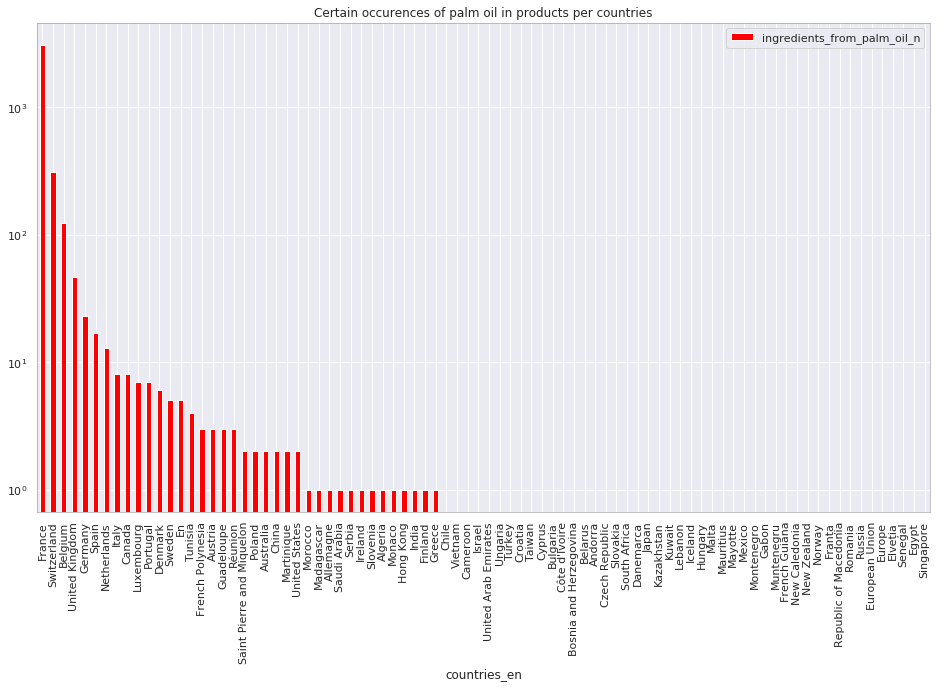

In [48]:
# The distribution of the number of certain products containing palm oil over countries
palm_countries_grouped.plot(kind='bar', figsize=(16,9), logy=True, color='red')
plt.title('Certain occurences of palm oil in products per countries')

We can visualize these countries in a map using the function already defined.
We visualize the __log__ of the number of palm oil ingredients +1 in each country, in order not to have -inf for log(0).

In [49]:
palm_oil_map = folium.Map(tiles='cartodbpositron',location=[30,-30], zoom_start=2.5)
folium.GeoJson(geo_json_data).add_to(world_map)

palm_countries_log = palm_countries_grouped
palm_countries_log['Log'] = np.log(palm_countries_log['ingredients_from_palm_oil_n']+1)
generate_folium_map(palm_countries_log,"Log",\
                    "Products that contain ingredients from palm oil by country",our_map=palm_oil_map,\
                    colors=cm.linear.BuPu_03)

palm_oil_map

We clearly see the differences between the countries with the biggest and smallest counts, and see that France stands out, because it is the country that is most represented in the dataset.

Taking the __log__ really helps the vizualisation, while keeping the order.

We see also that the countries not represented in the dataset (in grey) are very numerous this time, and that's mainly because not all the information is available for all products. Most of these countries are in Africa, South America and the Middle East.

NB : The Purple dot in South America is Guyana which is a French territory, that is why it is purple too.

We now look at the number of products with uncertain ingredients from palm oil over the different countries.

In [50]:
palm_countries = cleaned_df.loc[:,['countries_en','ingredients_that_may_be_from_palm_oil_n']]\
                .dropna()[cleaned_df.ingredients_that_may_be_from_palm_oil_n>0]

palm_countries_grouped = palm_countries.groupby('countries_en').sum()\
                        .sort_values(by=['ingredients_that_may_be_from_palm_oil_n'],ascending=False)
    
palm_countries_grouped = palm_countries_grouped.drop(palm_countries_grouped[palm_countries_grouped.index.str.contains(':')].index)
    

palm_countries_grouped.head()

,ingredients_that_may_be_from_palm_oil_n
countries_en,
France,19355.0
United States,3380.0
Switzerland,1203.0
Belgium,500.0
Spain,276.0


Text(0.5,1,'Unertain occurences of palm oil in products per countries')

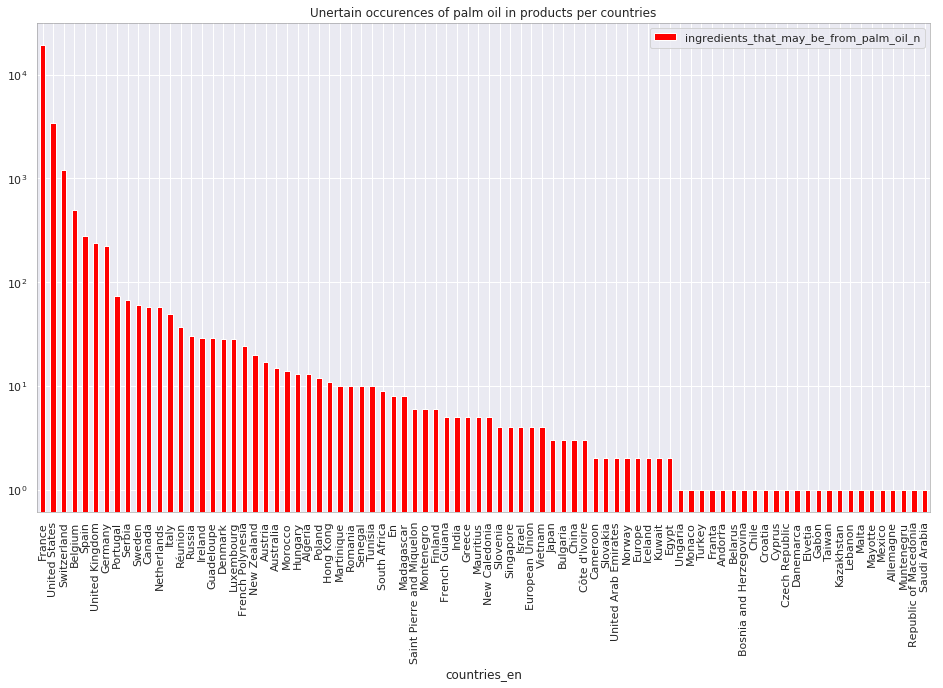

In [51]:
# The distribution of the number of uncertain products containing palm oil over countries
palm_countries_grouped.plot(kind='bar', figsize=(16,9), logy=True, color='red')
plt.title('Unertain occurences of palm oil in products per countries')

We can visualize this data on a map, using the __log__ directly because all values are >0.

In [52]:
palm_oil_likely_map = folium.Map(tiles='cartodbpositron',location=[30,-30], zoom_start=2.5)
folium.GeoJson(geo_json_data).add_to(palm_oil_map)

palm_countries_grouped["ingredients_that_may_be_from_palm_oil_n"] = np.log(palm_countries_grouped['ingredients_that_may_be_from_palm_oil_n'])

generate_folium_map(palm_countries_grouped,"ingredients_that_may_be_from_palm_oil_n",
                    "Products that contain ingredients that may be from palm oil by country",our_map=palm_oil_likely_map,
                    colors=cm.linear.PuBu_08)
palm_oil_likely_map

We clearly see the differences between the countries with the biggest and smallest counts, and see that France stands out because it is the country that is most represented in the dataset.

We see also that the countries not represented in the dataset are very numerous this time, and that's mainly because not all the information is available for all products. Most of these countries are in Africa, South America and the Middle East.

NB : The Purple dot in South America is Guyana which is a French territory, that is why it is purple too.

#### Using the averages

In the last two maps, we used the counts of the ingredients linked to palm oil in each country. However, using the __average__ would be more reprentative,  but we need to first remove the outliers: we remove the countries that have less than 10 products entered in the palm oil column.

In [53]:
palm_countries = cleaned_df.loc[:,['countries_en','ingredients_from_palm_oil_n']]\
                .dropna()[cleaned_df.ingredients_that_may_be_from_palm_oil_n>0]


    
#We count the number of products per country
palm_countries_count = palm_countries.groupby('countries_en').count()\
                        .sort_values(by=['ingredients_from_palm_oil_n'],ascending=False)
#We keep only the ones that have at least 10 entries    
palm_countries_count = palm_countries_count[palm_countries_count.ingredients_from_palm_oil_n>10]



#We then take the average of the ingredients from palm oil for each country
palm_countries_grouped = palm_countries.groupby('countries_en').mean()\
                        .sort_values(by=['ingredients_from_palm_oil_n'],ascending=False)

#We drop the countries that have : in them, because they are not countries
palm_countries_grouped = palm_countries_grouped.drop(palm_countries_grouped[palm_countries_grouped.index.str.contains(':')].index)

#We keep only the countries that have at least 10 entries 
palm_countries_grouped = palm_countries_grouped.loc[palm_countries_count.index].sort_values(by=['ingredients_from_palm_oil_n'],ascending=False)

#The values are very small so we multiply them by 100 to visualize them better
palm_countries_grouped['ingredients_from_palm_oil_n'] = palm_countries_grouped['ingredients_from_palm_oil_n']*100

palm_countries_grouped.head()

,ingredients_from_palm_oil_n
countries_en,
Switzerland,32.004090
Netherlands,31.111111
Allemagne,1.000000
China,0.666667
En,0.625000


In [54]:
palm_oil_map = folium.Map(tiles='cartodbpositron',location=[30,-30], zoom_start=2.5)
folium.GeoJson(geo_json_data).add_to(world_map)

palm_countries_log = palm_countries_grouped

generate_folium_map(palm_countries_log,"ingredients_from_palm_oil_n",\
                    "Products that contain ingredients from palm oil by country",our_map=palm_oil_map,\
                    colors=cm.linear.BuPu_03)

palm_oil_map

- Several countries are missing because we didn't have enough entries for them
- The map looks different than the last one, France is no more ranked first
- Most countries are in Europe, North America or Oceania.

We can now do the same thing for the ingredients that __may__ be from palm oil.

In [55]:
palm_countries = cleaned_df.loc[:,['countries_en','ingredients_that_may_be_from_palm_oil_n']]\
                .dropna()[cleaned_df.ingredients_that_may_be_from_palm_oil_n>0]
    
#We count the number of products per country
palm_countries_count = palm_countries.groupby('countries_en').count()\
                        .sort_values(by=['ingredients_that_may_be_from_palm_oil_n'],ascending=False)
    
#We keep only the ones that have at least 10 entries    
palm_countries_count = palm_countries_count[palm_countries_count.ingredients_that_may_be_from_palm_oil_n>10]

#We then take the average of the ingredients from palm oil for each country
palm_countries_grouped = palm_countries.groupby('countries_en').mean()\
                        .sort_values(by=['ingredients_that_may_be_from_palm_oil_n'],ascending=False)
    
#We drop the countries that have : in them, because they are not countries
palm_countries_grouped = palm_countries_grouped.drop(palm_countries_grouped[palm_countries_grouped.index.str.contains(':')].index)


#We keep only the countries that have at least 10 entries 

palm_countries_grouped = palm_countries_grouped.loc[palm_countries_count.index]\
                            .sort_values(by=['ingredients_that_may_be_from_palm_oil_n'],ascending=False)
#The values are very small so we multiply them by 10 to visualize them better
palm_countries_grouped['ingredients_that_may_be_from_palm_oil_n'] = palm_countries_grouped['ingredients_that_may_be_from_palm_oil_n']*10

palm_countries_grouped.head()

,ingredients_that_may_be_from_palm_oil_n
countries_en,
New Zealand,14.285714
Portugal,14.038462
Vietnam,2.000000
Kuwait,2.000000
Netherlands,13.555556


In [56]:
palm_oil_likely_map = folium.Map(tiles='cartodbpositron',location=[30,-30], zoom_start=2.5)
folium.GeoJson(geo_json_data).add_to(palm_oil_map)

#palm_countries_grouped["ingredients_that_may_be_from_palm_oil_n"] = np.log(palm_countries_grouped['ingredients_that_may_be_from_palm_oil_n'])

generate_folium_map(palm_countries_grouped,"ingredients_that_may_be_from_palm_oil_n",
                    "Products that contain ingredients that may be from palm oil by country",our_map=palm_oil_likely_map,
                    colors=cm.linear.PuBu_08)
palm_oil_likely_map

##### _Partial Conclusion_

**France** and **USA** are the countries that are the most represented in the dataset

**France, Switzerland** and **Belgium** are the countries that have the most products with ingredients containing palm oil. (France probably because it is the most represented country in the dataset). 

Using the average number of products (possibly) from palm oil gives us a completely new perspective that lets us assert that the results obtained before were only due to the predominance of products from France and the US. But since we don't have that much data on the products from countries other than France, we cannot conclude much regarding the countries.

However, by comparing the above analysis, what we really notice is that we still have lots of products where we have uncertainity concerning the existence of the palm oil which is quite suspicious.

#### B. Carbon footprint

#### the goods with the highest carbon foodprint.

In [57]:
df_open_food_fact['carbon-footprint_100g'].describe()

count     342.000000
mean      271.528992
std       405.252492
min        -0.000281
25%         2.300000
50%       150.000000
75%       338.750000
max      2842.000000
Name: carbon-footprint_100g, dtype: float64

In [58]:
# Products containing highest amounts of carbon footprints
carbon_print = df_open_food_fact.loc[:,['main_category', 'carbon-footprint_100g']]\
                .dropna()[df_open_food_fact['carbon-footprint_100g']>0]
carbon_print.groupby('main_category').sum().sort_values(by=['carbon-footprint_100g'], ascending=False).head()

,carbon-footprint_100g
main_category,
en:sugary-snacks,25226.1000
en:meats,11430.0000
en:beverages,10297.0000
en:dairies,9960.5547
en:plant-based-foods-and-beverages,9949.5600


We notice that the highest amounts of carbon-footpring are contained in __Sugar__, then meats and beverages.  
Something interesting is that this carbon footpring tend to get high also with __meats__. Which is something that is very known, lots of studies have showed that meets are inderectly one of the most polluants concerning carbon footprint.

### Healthy/bad products

In the following visualizations, we will be trying to look at some healthy products in form of a spyder as well as some bad products, the aim is to have a first idea about how are the macros in these two categories :

In [ ]:
# Cleaned DATA
ind = list(new_energy_data.index.values) 
new_cleaned_df = cleaned_df.iloc[ind,:] 

# we separate our dataset into two categories: 
# healthy food with nutrition grade A et bad food with nutrition grade E
healthy_data = new_cleaned_df[new_cleaned_df.nutrition_grade_fr=='a']
bad_data = new_cleaned_df[new_cleaned_df.nutrition_grade_fr=='e']

In [ ]:
# We are interested in the following columns
list_columns = ['fat_100g', 'saturated-fat_100g', 'sugars_100g', 'carbohydrates_100g','proteins_100g', 'salt_100g']
healthy_data[list_columns].head()

We adapt a script found in stackoverflow to draw a radar plot : 
https://stackoverflow.com/questions/42227409/tutorial-for-python-radar-chart-plot

In [ ]:
def spider(values, cat, ax):
    pi = np.pi
    N = len(cat)
    x_as = [n / float(N) * 2 * pi for n in range(N)]
    # for circularity
    values += values[:1]
    x_as += x_as[:1]
    # Set color of axes
    plt.rc('axes', linewidth=0.5, edgecolor="#888888")
    # Set clockwise rotation. That is:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    # Set position of y-labels
    ax.set_rlabel_position(0)
    # Set color and linestyle of grid
    ax.xaxis.grid(True, color="#888888", linestyle='solid', linewidth=0.5)
    ax.yaxis.grid(True, color="#888888", linestyle='solid', linewidth=0.5)
    # Set ticks values and labels    
    ax.set_xticks(x_as[:-1])
    ax.set_xticklabels([])
    ax.set_yticks([0.1, 0.5, 1, 2, 10])
    ax.set_yticklabels(["0.1", "0.5", "1", "2", "10"])
    # Plot data
    ax.plot(x_as, values, linewidth=0, linestyle='solid', zorder=3)
    # Fill area
    ax.fill(x_as, values, 'b', alpha=0.3)
    # Set axes limits
    ax.set_ylim(0, 3)
    # Draw ytick labels to make sure they fit properly
    for i in range(N):
        angle_rad = i / float(N) * 2 * pi
        if angle_rad == 0:
            ha, distance_ax = "center", 3
        elif 0 < angle_rad < pi:
            ha, distance_ax = "left", 3
        elif angle_rad == pi:
            ha, distance_ax = "center", 3
        else:
            ha, distance_ax = "right", 3

        ax.text(angle_rad, 0.2+distance_ax, cat[i], size=10,
                horizontalalignment=ha, verticalalignment="center")

Visulalisation of distribution of `fat`, `sugar`, `carbohydrates`, `proteins` and `salt` in some **Healthy products** :

In [ ]:
# Healthy data
df_chart = healthy_data[pd.notnull(healthy_data[list_columns]).all(axis = 1)]
mean_columns = healthy_data[list_columns].mean()
print('Means_values for healthy products:')
print(mean_columns)
mean_values = list(mean_columns.values)

# Healthy products 
fig, axes = plt.subplots(nrows=2, ncols=2, subplot_kw=dict(projection='polar'), figsize=(11,11))
axes = np.array(axes)

list_nutriments = [s.strip('_100g') for s in list_columns]

ind = 0
for ax in axes.reshape(-1):
    ind += 1
    ind2 = 3*ind # 
    absolute_values = list(df_chart.iloc[ind2][list_columns].T.values)
    values  = [ val/mean_values[i] for i, val in enumerate(absolute_values)]
    spider(values, list_nutriments, ax)
    ax.set_title(df_chart.iloc[ind2]['product_name'], fontsize = 15)
    
fig.subplots_adjust(hspace=0.5)
plt.show()

Visulalisation of distribution of `fat`, `sugar`, `carbohydrates`, `proteins` and `salt` in some **Bad products** :

In [ ]:
# Bad products 
df_chart = bad_data[pd.notnull(bad_data[list_columns]).all(axis = 1)]
mean_columns = bad_data[list_columns].mean()
print('Means_values for bad products:')
print(mean_columns)
mean_values = list(mean_columns.values)

fig, axes = plt.subplots(nrows=2, ncols=2, subplot_kw=dict(projection='polar'), figsize=(11,11))
axes = np.array(axes)

list_nutriments = [s.strip('_100g') for s in list_columns]

ind = 0
for ax in axes.reshape(-1):
    ind += 1
    ind2 = 10*ind # 
    absolute_values = list(df_chart.iloc[ind2][list_columns].T.values)
    values  = [ val/mean_values[i] for i, val in enumerate(absolute_values)]
    spider(values, list_nutriments, ax)
    ax.set_title(df_chart.iloc[ind2]['product_name'], fontsize = 15)
    
fig.subplots_adjust(hspace=0.5)
plt.show()

#### By the categories of the products

We can also vizualize the predominant categories in the healthy products and the unhealthy ones.

In [ ]:
healthy_categories = healthy_data[['main_category_en','product_name']].groupby('main_category_en').count().sort_values(by=['product_name'], ascending=False)
healthy_categories[:15][::-1].plot(kind='barh', figsize=(16,9), color='red')
plt.title('Number of healthy products in the main category products')
plt.tight_layout()
plt.show()

In [ ]:
bad_categories = bad_data[['main_category_en','product_name']].groupby('main_category_en').count().sort_values(by=['product_name'], ascending=False)
bad_categories[:15][::-1].plot(kind='barh', figsize=(16,9), color='red')
plt.title('Number of non healthy products in in the main category products')
plt.tight_layout()
plt.show()

ADVICES FOR CUSTOMERS :

In [65]:
healthy_data_a_b = new_cleaned_df[new_cleaned_df.nutrition_grade_fr.isin(['a','b'])]

In [68]:
healthy_data_a_b[healthy_data_a_b['categories_en'] == 'Sugary snacks']

,created_t,created_datetime,product_name,quantity,packaging,brands,categories_en,origins,labels_en,emb_codes,...,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g
152562,1497180951,2017-06-11T11:35:51Z,Minis Muesli Granola Pomme Cannelle,24 g,Plastique,Made Good,Sugary snacks,NaN,"Organic,Vegetarian,Kosher,Vegan,Gluten-free,Or...",NaN,...,25.0,7.0,6.0,0.0300,0.011811,0.000833,0.05,NaN,0.00209,2.0
233567,1537358363,2018-09-19T11:59:23Z,galettes de riz,130g,paquet,Bjorg,Sugary snacks,NaN,NaN,NaN,...,1.5,5.5,10.0,0.2000,0.078740,NaN,NaN,NaN,NaN,-6.0
385994,1487315515,2017-02-17T07:11:55Z,Tartines Ki'Kroc,270 g,plastique et carton,Grillon D'Or,Sugary snacks,NaN,Organic,NaN,...,2.2,4.0,8.5,0.4100,0.161417,NaN,NaN,NaN,NaN,-4.0
487049,1490294467,2017-03-23T18:41:07Z,La Boule Brownie,23 g,"Carton,Plastique",Funky Veggie,Sugary snacks,NaN,"Vegetarian,100% natural,Vegan,100% vegetable,G...",NaN,...,40.1,9.7,9.2,0.1000,0.039370,NaN,NaN,NaN,NaN,0.0
563613,1502809671,2017-08-15T15:07:51Z,Ideamix,150 g,"Sachet,plastique,doypack",Shine,Sugary snacks,NaN,"Organic,Vegetarian,EU Organic,Vegan,Gluten-fre...",NaN,...,17.8,21.7,14.0,0.0300,0.011811,NaN,NaN,0.232,0.00464,-2.0
607067,1515649737,2018-01-11T05:48:57Z,Hony Bran,33 g,Plástico,Nabisco,Sugary snacks,NaN,NaN,NaN,...,7.7,0.9,2.2,0.1320,0.051969,NaN,NaN,NaN,NaN,2.0
608816,1502949977,2017-08-17T06:06:17Z,"Holle Crunchy Snack Hirse Mango, 25 GR Packung",25g,paquet,Holle,Sugary snacks,NaN,Organic,NaN,...,2.5,0.0,8.8,0.0508,0.020000,NaN,NaN,NaN,NaN,1.0
608925,1497013989,2017-06-09T13:13:09Z,Smowl superfood mix coco lime,115g,Gourde,SMOWL,Sugary snacks,NaN,"Organic,Vegetarian,EU Organic,High proteins,Ve...",NaN,...,8.0,3.6,4.4,0.0000,0.000000,NaN,NaN,NaN,NaN,-1.0
608926,1502533514,2017-08-12T10:25:14Z,SMOWL Superfood Mix Mango Passion,115g,Gourde,SMOWL,Sugary snacks,NaN,"Organic,Vegetarian,EU Organic,High proteins,Ve...",NaN,...,7.5,3.5,3.2,0.0200,0.007874,NaN,NaN,NaN,NaN,-3.0
608928,1526544346,2018-05-17T08:05:46Z,Smowl banana cocoa acai,115g,Gourde,SMOWL,Sugary snacks,NaN,"Organic,Vegetarian,EU Organic,High proteins,Ve...",NaN,...,8.9,2.2,3.9,0.0000,0.000000,NaN,NaN,NaN,NaN,-1.0


In [70]:
healthy_data_a_b[healthy_data_a_b['categories_en'] == 'meats']

,created_t,created_datetime,product_name,quantity,packaging,brands,categories_en,origins,labels_en,emb_codes,...,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g
